Link to Q2 b, c parts: https://docs.google.com/document/d/1GtahQjB-Q0JOz368FI299nCUc3Mbdmn4KgJBnwOvezU/edit?usp=sharing

## Q2d

In [ ]:
!pip install --upgrade joblib==1.1.0
!pip install bioinfokit
!pip install hdbscan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import pandas as pd
%matplotlib inline

In [ ]:
from bioinfokit.analys import get_data
df = get_data('ath_root').data
df = df.set_index(df.columns[0])
dft = df.T
dft.head(2)

gene,AT1G01070,RPP1A,HTR12,AT1G01453,ADF10,PLIM2B,SBTI1.1,GL22,GPAT2,AT1G02570,...,AT5G66440,AT5G66580,AT5G66590,AT5G66800,AT5G66815,AT5G66860,AT5G66985,IRX14H,PER73,RPL26B
AAACCTGAGACAGACC-1,0.51,1.40,-0.26,-0.28,-0.24,-0.14,-0.13,-0.07,-0.29,-0.31,...,0.61,-0.55,-0.41,-0.43,2.01,3.01,-0.24,-0.18,-0.34,1.16
AAACCTGAGATCCGAG-1,-0.22,1.36,-0.26,-0.28,-0.60,-0.51,-0.13,-0.07,-0.29,-0.31,...,-0.48,-0.55,-0.41,-0.43,-0.24,0.89,-0.24,-0.18,-0.49,-0.68


In [ ]:
dft_arr = dft.to_numpy()
dft_arr

array([[ 0.51,  1.4 , -0.26, ..., -0.18, -0.34,  1.16],
       [-0.22,  1.36, -0.26, ..., -0.18, -0.49, -0.68],
       [-0.22,  2.49, -0.26, ..., -0.18, -0.49,  1.6 ],
       ...,
       [-0.22,  0.68, -0.26, ..., -0.18, -0.4 ,  0.25],
       [-0.22,  2.49, -0.26, ..., -0.18, -0.49,  3.03],
       [-0.22,  1.2 , -0.26, ..., -0.18, -0.49,  0.21]])

In [ ]:
# dft.to_csv('/content/file2.csv')

In [ ]:
from sklearn.manifold import TSNE
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=0).fit_transform(dft)
test_data = tsne_em

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
def counts(lst):
  for i in set(lst):
    print(f"Count of {i} is {lst.count(i)}")

def plots(clusterer):
  plt.figure(figsize=(8,6))
  clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
  
  palette = sns.color_palette()
  x=[]
  for col, sat in zip(clusterer.labels_, clusterer.probabilities_):
    # print(col)
    # if col>9:
      # x+=[sns.desaturate(palette[9], sat)]
    if col>=0:
      x+=[sns.desaturate(palette[col], sat)]
    else:
      x+=[(0, 0, 0)]
  plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
  plt.figure(figsize=(10,6))
  plt.scatter(tsne_em.T[0], tsne_em.T[1], c=x, **plot_kwds)

In [ ]:
import hdbscan
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40, cluster_selection_method='eom',
    metric='euclidean', min_cluster_size=20, min_samples=20, p=None)
clusterer.fit(dft_arr)
plt.figure(figsize=(8,6))
counts(list(clusterer.labels_))
plots(clusterer)

Count of 0 is 46
Count of 1 is 83
Count of 2 is 78
Count of 3 is 270
Count of 4 is 433
Count of 5 is 218
Count of -1 is 3278


<Figure size 576x432 with 0 Axes>

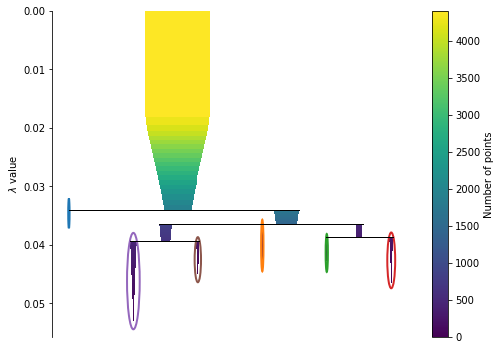

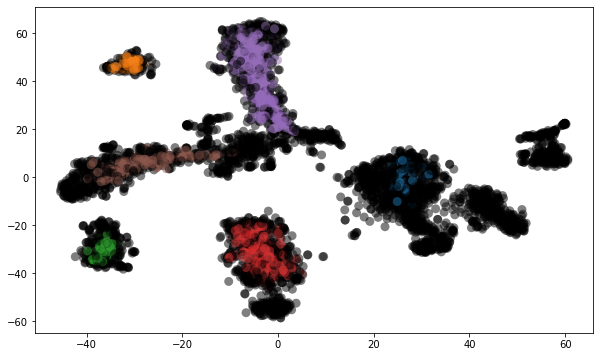

In [ ]:
import hdbscan
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40, cluster_selection_method='eom',
    metric='euclidean', min_cluster_size=20, min_samples=2, p=None)
clusterer.fit(dft_arr)
plt.figure(figsize=(8,6))
counts(list(clusterer.labels_))
plots(clusterer)

In [ ]:
plt.figure(figsize=(10,6))
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

In [ ]:
# palette = sns.color_palette()
# x=[]
# for col, sat in zip(clusterer.labels_, clusterer.probabilities_):
#   # print(col)
#   # if col>9:
#     # x+=[sns.desaturate(palette[9], sat)]
#   if col>=0:
#     x+=[sns.desaturate(palette[col], sat)]
#   else:
#     x+=[(0, 0, 0)]
# plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
# plt.figure(figsize=(10,6))

# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
# # cols = ['IHD', 'CM', 'ARR', 'VD', 'CHD', 'CCD', 'VOO']
# # df = pd.DataFrame(np.random.random((1400, 7)), columns = cols)
# pca = PCA(n_components=2)
# pca.fit(dft)
# print(pca.components_)
# print(pca.explained_variance_)

# df2 = pd.DataFrame(pca.transform(dft), columns = ['first', 'second'])
# df2.plot.scatter(x = 'first', y = 'second', c=x)

In [ ]:
df['labels'] = clustering_labels
from sklearn import metrics
metrics.silhouette_score(df, df['labels'])

### Tuning the Input Parameters

Count of 0 is 46
Count of 1 is 83
Count of 2 is 78
Count of 3 is 270
Count of 4 is 433
Count of 5 is 218
Count of -1 is 3278


<Figure size 576x432 with 0 Axes>

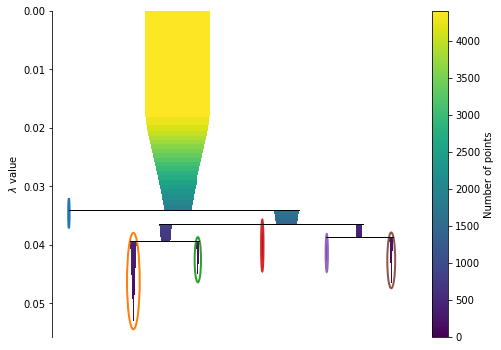

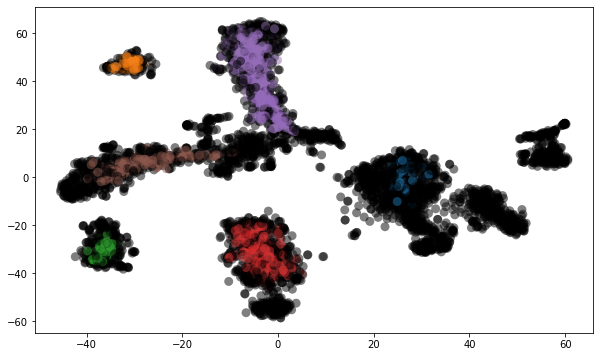

In [ ]:
### changed the cluster selection method to leaf
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40, cluster_selection_method='leaf',
    metric='euclidean', min_cluster_size=20, min_samples=2, p=None)
clusterer.fit(dft_arr)
plt.figure(figsize=(8,6))
counts(list(clusterer.labels_))
plots(clusterer)

In [ ]:
set(clusterer.labels_)

Count of 0 is 49
Count of 1 is 245
Count of 2 is 53
Count of 3 is 360
Count of 4 is 141
Count of -1 is 3558


<Figure size 576x432 with 0 Axes>

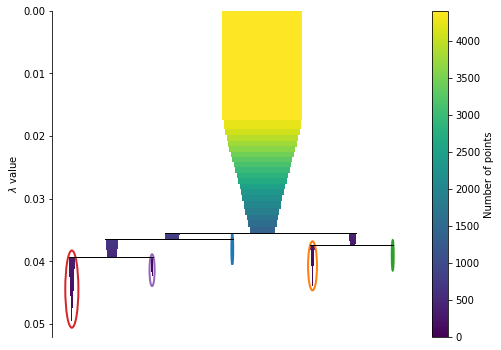

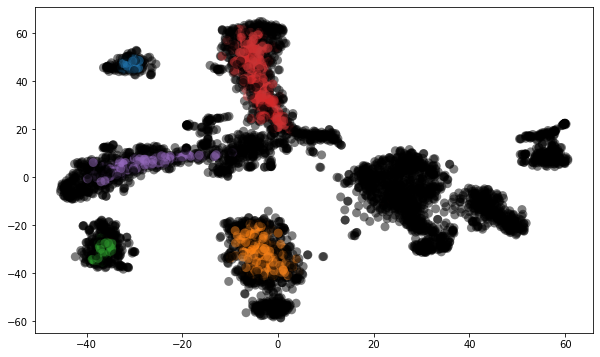

In [ ]:
### changed the min sample size to 10
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40, cluster_selection_method='eom',
    metric='euclidean', min_cluster_size=20, min_samples=10, p=None)
clusterer.fit(dft_arr)
plt.figure(figsize=(8,6))
counts(list(clusterer.labels_))
plots(clusterer)

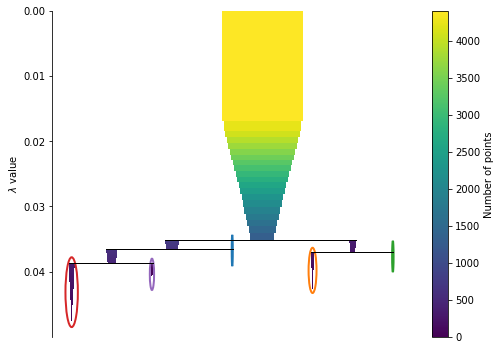

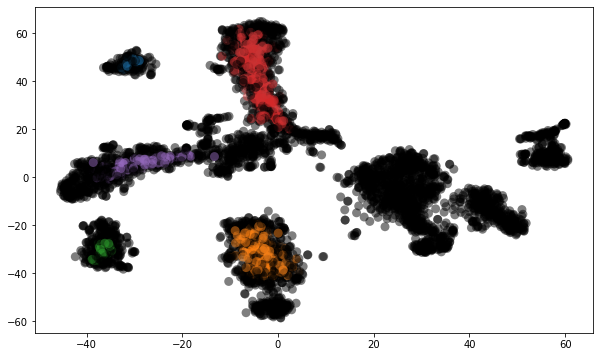

In [ ]:
### changed the min sample size to 20

clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40, cluster_selection_method='eom',
    metric='euclidean', min_cluster_size=20, min_samples=20, p=None)
clusterer.fit(dft_arr)
plt.figure(figsize=(8,6))
counts(list(clusterer.labels_))
plots(clusterer)

In [ ]:
### changed the min sample size to 100

clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40, cluster_selection_method='eom',
    metric='euclidean', min_cluster_size=5, min_samples=100, p=None)
clusterer.fit(test_data)
plots(clusterer)

In [ ]:
### changed the min cluster size to 20

clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40, cluster_selection_method='eom',
    metric='euclidean', min_cluster_size=20, min_samples=10, p=None)
clusterer.fit(test_data)
plots(clusterer)

In [ ]:
### changed the min cluster size to 100

clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40, cluster_selection_method='eom',
    metric='euclidean', min_cluster_size=40, min_samples=10, p=None)
clusterer.fit(test_data)
plots(clusterer)

In [ ]:
### changed alpha to 0.5

clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=0.5, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40, cluster_selection_method='eom',
    metric='euclidean', min_cluster_size=5, min_samples=10, p=None)
clusterer.fit(test_data)
plots(clusterer)

In [ ]:
### changed the leaf size to 20

clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=20, cluster_selection_method='eom',
    metric='euclidean', min_cluster_size=5, min_samples=10, p=None)
clusterer.fit(test_data)
plots(clusterer)

In [ ]:
### changed the leaf size to None

clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=None, cluster_selection_method='eom',
    metric='euclidean', min_cluster_size=5, min_samples=10, p=None)
clusterer.fit(test_data)
plots(clusterer)

## Rough work below

In [ ]:
# df = pd.read_csv("https://reneshbedre.github.io/assets/posts/tsne/tsne_scores.csv")
# df = df.to_numpy()


# from sklearn.datasets import load_digits
# digits = load_digits()
# print(digits.data.shape)
# df2 = pd.DataFrame(digits.data)
# df2.head()

(1797, 64)


In [ ]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=True, leaf_size=40, cluster_selection_method='leaf',
    metric='euclidean', min_cluster_size=5, min_samples=10, p=None)
clusterer.fit(test_data)

HDBSCAN(cluster_selection_method='leaf', gen_min_span_tree=True)

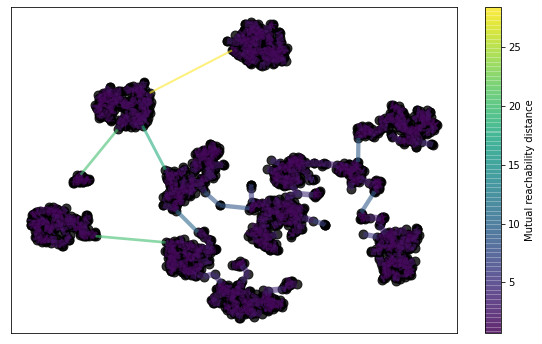

In [ ]:
plt.figure(figsize=(10,6))
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

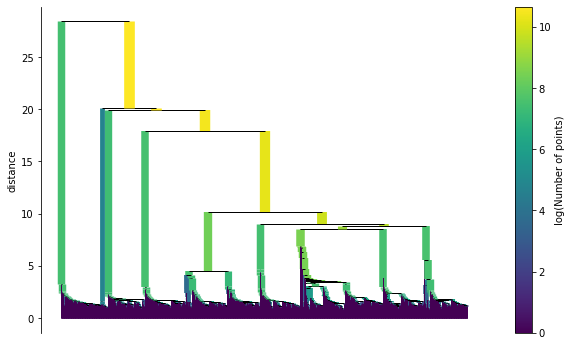

In [ ]:
plt.figure(figsize=(10,6))
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

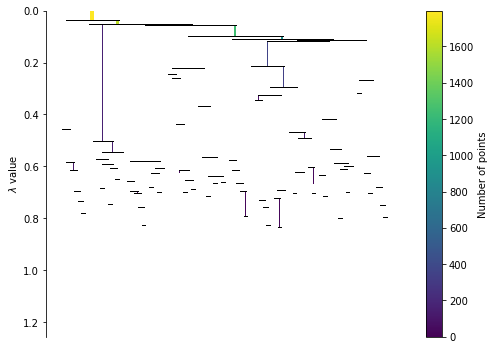

In [ ]:
plt.figure(figsize=(8,6))
clusterer.condensed_tree_.plot()

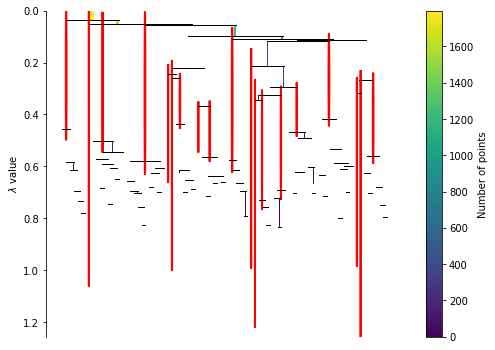

In [ ]:
plt.figure(figsize=(8,6))
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [ ]:
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

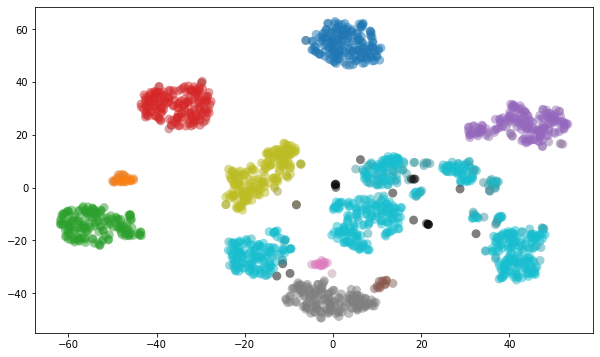

In [ ]:

# x = [sns.desaturate(palette[col], sat)
#                   if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
#                   zip(clusterer.labels_, clusterer.probabilities_)]
palette = sns.color_palette()
x=[]
for col, sat in zip(clusterer.labels_, clusterer.probabilities_):
  # print(col)
  if col>9:
    x+=[sns.desaturate(palette[9], sat)]
  elif col>=0:
    x+=[sns.desaturate(palette[col], sat)]
  else:
    x+=[(0, 0, 0)]
  
plt.figure(figsize=(10,6))
plt.scatter(test_data.T[0], test_data.T[1], c=x, **plot_kwds)